In [1]:
# Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,cross_val_score
import os
print('Libraries successfully installed')

Libraries successfully installed


In [2]:
# Change the present working directory to enable the file to be read 
os.chdir('Downloads')

In [3]:
# Load and read the train dataset
train = pd.read_csv('train.csv')

In [4]:
# Display the first five entries of the dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# check the details of the dataframe, details such as file type,etc.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Check the sum of the missing values 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Check to see if there is any duplicate in the records
train[train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
# create another dataframe for the number and percentages of missing values
perc_missing_train= pd.DataFrame({'missing_values':train.isnull().sum(), '%_missing_value':train.isnull().sum()/len(train)*100})
perc_missing_train

,missing_values,%_missing_value
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


##### DATA CLEANING

In [9]:
# fill the missing values in the age column with the mean
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [10]:
# Fill the missing values in the cabin column with unknown
train['Cabin'] = train['Cabin'].fillna('unknown')

In [11]:
# drop the rows with missing value in the dataframe. 
train.dropna(inplace=True)

In [12]:
# checking to see if the data is completely cleaned
train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

##### Exploratory Data Analysis

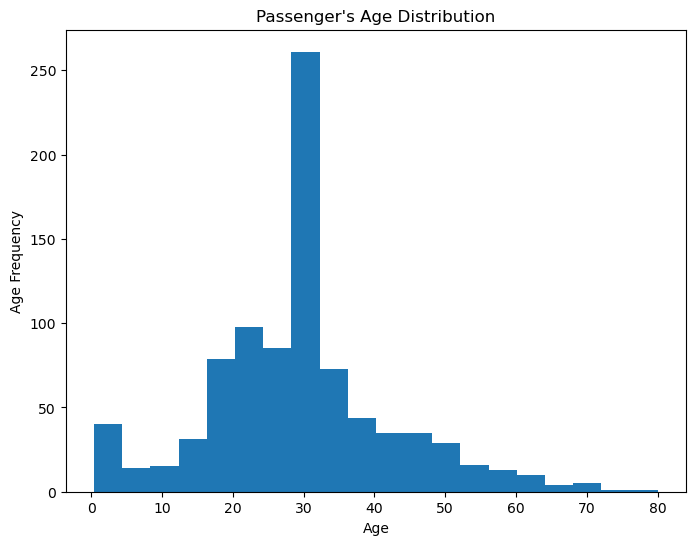

In [13]:
# Plotting a histogram to see the age distribution of the passengers
plt.figure(figsize=(8,6))
plt.hist(train['Age'], bins =20)
plt.xlabel('Age')
plt.ylabel('Age Frequency')
plt.title('Passenger\'s Age Distribution')

plt.savefig('Age_Frequency')

plt.show()


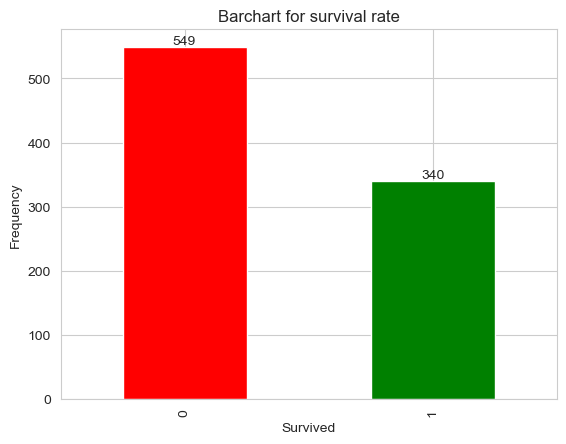

In [14]:
# Bar chart to check survival vs non-survival rate
sns.set_style(rc={'figure.figsize':(8,8)}, style='whitegrid')
ax = train['Survived'].value_counts().plot.bar(color=['red','green'])
for bars in ax.containers:
  ax.bar_label(bars)
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.title('Barchart for survival rate')
plt.show()

In [15]:
# Check survival rate by gender
survived_by_gender = train.groupby(['Survived', 'Sex'], as_index= False).size()
survived_by_gender

,Survived,Sex,size
0,0,female,81
1,0,male,468
2,1,female,231
3,1,male,109


Text(0.5, 1.0, 'Fare Distribution Plot')

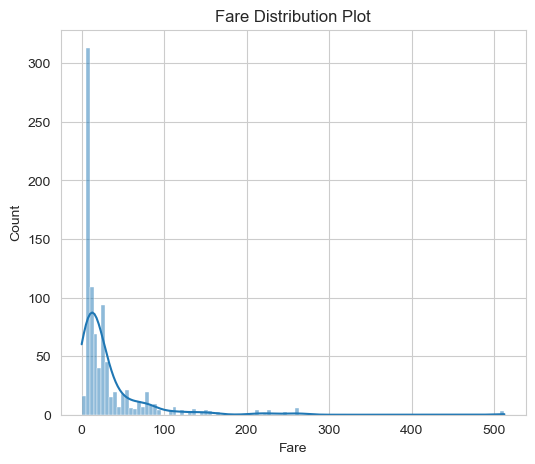

In [16]:
# Fare Distribution
plt.figure(figsize=(6,5))
sns.histplot(train['Fare'], kde='true')
plt.title('Fare Distribution Plot')


<Axes: >

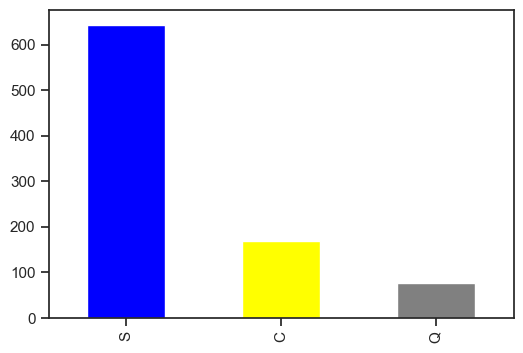

In [17]:
sns.set(rc={'figure.figsize':(6,4)}, style='ticks')
train['Embarked'].value_counts().plot.bar(color=['blue','yellow','grey'])

<Axes: xlabel='Pclass', ylabel='count'>

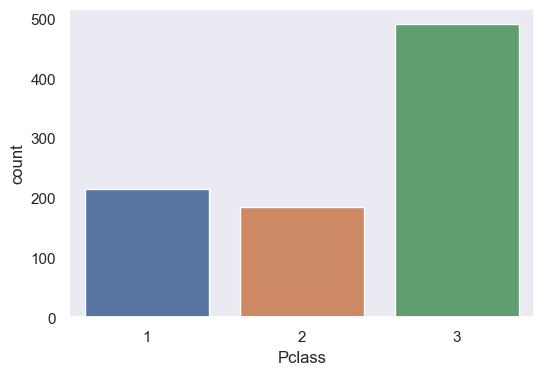

In [18]:
sns.set(rc={'figure.figsize':(6,4)}, style='dark')
sns.countplot(train, x ='Pclass')

##### Model Building

In [19]:
features = ['Survived', 'Pclass',	'Sex',	'Age',	'SibSp',	'Parch',		'Fare',	'Embarked']
encoded_train = train[features]

In [20]:
# use one hot encoder to transform categorical variable into numeric variable
encoder=OneHotEncoder()
encoded_train = pd.get_dummies(encoded_train, columns=['Sex', 'Embarked'])
encoded_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [21]:
encoded_train['Survived'] = encoded_train['Survived']

In [22]:
# Split the dataset into the input and output variable
X = encoded_train.drop('Survived', axis=1).values
y = encoded_train['Survived'].values

In [23]:
# Split the data using the train test split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2, random_state=24)

In [24]:
# Scale the data using Min Max Scaler so logistic regression could be effective
scale = MinMaxScaler()
X_train_scaled =scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [25]:
clf = LogisticRegression()

In [26]:
# Fit the model on the dataset
clf.fit(X_train_scaled,y_train)

LogisticRegression()

In [27]:
# predict the model
y_pred = clf.predict(X_test_scaled)

In [28]:
# Check the accuracey score for the model
accuracy_score(y_pred, y_test)

0.8764044943820225

In [29]:
# Perform parameter tuning to see if the model accuracy score will increase
param_grid= {
    'penalty':['l1','l2'],
    'max_iter': [1000],
    'C': (0.001, 0.01, 0.1, 1, 10, 100),
    'solver':['liblinear']
}

In [30]:
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': (0.001, 0.01, 0.1, 1, 10, 100),
                         'max_iter': [1000], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [31]:
best_params = grid_search.best_params_
print('best_hyperparameters', best_params)

best_hyperparameters {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}


In [32]:
grid_search.best_score_

0.7946616763518173

In [33]:
# use the hypertuned model for prediction and see if it improves
clf_tuned = grid_search.predict(X_test_scaled)
accuracy_score(clf_tuned, y_test)

0.8707865168539326

##### Model Deployment

In [34]:
# read the test dataset into a dataframe
test = pd.read_csv('test.csv')

In [35]:
# Check to see the sum of missing values
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [36]:
# fill the missing values in the age column with the mean and the unknow in the Cabin
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test['Cabin'] = test['Cabin'].fillna('unknown')

In [37]:
# to check if there is still any missing value in the dataset.
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [38]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
encoded_test = test[features]

In [39]:
encoded_test = pd.get_dummies(encoded_test, columns=['Sex', 'Embarked'])
encoded_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [40]:
val=encoded_test.iloc[: , :].values

In [41]:
val_scaled = scale.fit_transform(val)

In [42]:
submission = grid_search.predict(val_scaled)

In [43]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':submission})

In [44]:
submission.to_csv('gender_submission.csv', index=False)